In [47]:
import torch
import torch.nn as nn
from torch.optim import Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

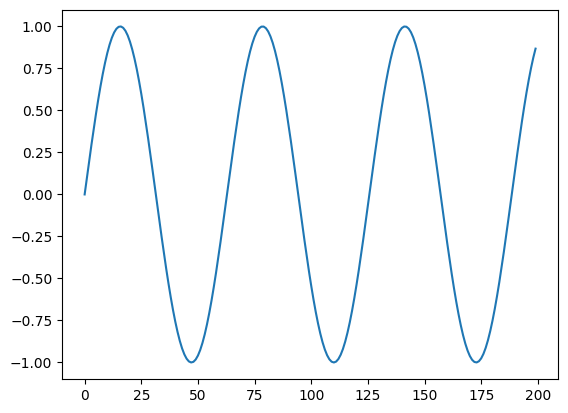

In [48]:
# Make the data
series = np.sin(0.1 * np.arange(200))

# Plot it
plt.plot(series)
plt.show()

In [49]:
# Building the dataset
# Using T past values to predict the next value
T = 10
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)

    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print(f'X.shape: {X.shape}, Y.shape: {Y.shape}')

X.shape: (190, 10), Y.shape: (190,)


In [50]:
X, Y

(array([[ 0.        ,  0.09983342,  0.19866933, ...,  0.64421769,
          0.71735609,  0.78332691],
        [ 0.09983342,  0.19866933,  0.29552021, ...,  0.71735609,
          0.78332691,  0.84147098],
        [ 0.19866933,  0.29552021,  0.38941834, ...,  0.78332691,
          0.84147098,  0.89120736],
        ...,
        [-0.14899903, -0.04953564,  0.05042269, ...,  0.52306577,
          0.60553987,  0.68196362],
        [-0.04953564,  0.05042269,  0.14987721, ...,  0.60553987,
          0.68196362,  0.75157342],
        [ 0.05042269,  0.14987721,  0.24783421, ...,  0.68196362,
          0.75157342,  0.81367374]]),
 array([ 0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
         0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
         0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
         0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
         0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
        

In [51]:
# Try autoregressive linear model

class MyNeuralNet(nn.Module):
    def __init__(self, T):
        super().__init__()
        self.layer = nn.Linear(T, 1)

    def forward(self, x):
        a = self.layer(x)
        return a

In [52]:
model = MyNeuralNet(T)
model

MyNeuralNet(
  (layer): Linear(in_features=10, out_features=1, bias=True)
)

In [53]:
loss_fn = nn.MSELoss()
optimizer = Adam(params=model.parameters(), lr=0.1)

In [54]:
data_train = X[:-N//2]
label_train = Y[:-N//2]

data_test = X[-N//2:]
label_test = Y[-N//2:]

X_train = torch.from_numpy(data_train).type(torch.float32)
y_train = torch.from_numpy(label_train).type(torch.float32)
X_test = torch.from_numpy(data_test).type(torch.float32)
y_test = torch.from_numpy(label_test).type(torch.float32)

In [55]:
# Training the RNN
for epoch in range(80):
    model.train()

    y_logits = model(X_train).squeeze()

    loss = loss_fn(y_logits, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model(X_test).squeeze()

        test_loss = loss_fn(test_logits, y_test)


    if epoch % 5 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}')

Epoch: 0 | Loss: 1.00684 | Test Loss: 0.23021
Epoch: 5 | Loss: 0.19874 | Test Loss: 0.09657
Epoch: 10 | Loss: 0.17161 | Test Loss: 0.06450
Epoch: 15 | Loss: 0.06795 | Test Loss: 0.07259
Epoch: 20 | Loss: 0.01530 | Test Loss: 0.05419
Epoch: 25 | Loss: 0.01417 | Test Loss: 0.01153
Epoch: 30 | Loss: 0.01679 | Test Loss: 0.00703
Epoch: 35 | Loss: 0.01347 | Test Loss: 0.00562
Epoch: 40 | Loss: 0.00569 | Test Loss: 0.00636
Epoch: 45 | Loss: 0.00275 | Test Loss: 0.00521
Epoch: 50 | Loss: 0.00083 | Test Loss: 0.00144
Epoch: 55 | Loss: 0.00018 | Test Loss: 0.00038
Epoch: 60 | Loss: 0.00015 | Test Loss: 0.00022
Epoch: 65 | Loss: 0.00022 | Test Loss: 0.00029
Epoch: 70 | Loss: 0.00017 | Test Loss: 0.00009
Epoch: 75 | Loss: 0.00007 | Test Loss: 0.00002


In [56]:
print(f'y_logits: {y_logits}')
print(f'\ny_train: {y_train}')

y_logits: tensor([ 0.8279,  0.8767,  0.9166,  0.9474,  0.9686,  0.9801,  0.9817,  0.9735,
         0.9555,  0.9279,  0.8909,  0.8450,  0.7906,  0.7282,  0.6585,  0.5821,
         0.4999,  0.4126,  0.3212,  0.2265,  0.1294,  0.0310, -0.0678, -0.1659,
        -0.2625, -0.3564, -0.4469, -0.5330, -0.6138, -0.6886, -0.7565, -0.8169,
        -0.8692, -0.9129, -0.9475, -0.9727, -0.9883, -0.9940, -0.9899, -0.9759,
        -0.9523, -0.9192, -0.8769, -0.8260, -0.7668, -0.7001, -0.6264, -0.5466,
        -0.4613, -0.3715, -0.2780, -0.1818, -0.0838,  0.0149,  0.1134,  0.2108,
         0.3059,  0.3980,  0.4860,  0.5691,  0.6465,  0.7173,  0.7809,  0.8367,
         0.8840,  0.9225,  0.9516,  0.9712,  0.9811,  0.9810,  0.9711,  0.9515,
         0.9223,  0.8838,  0.8364,  0.7806,  0.7170,  0.6461,  0.5687,  0.4856,
         0.3975,  0.3055,  0.2103,  0.1129,  0.0144, -0.0843, -0.1823, -0.2785,
        -0.3719, -0.4617, -0.5470, -0.6268, -0.7005, -0.7672, -0.8263],
       grad_fn=<SqueezeBackward0>)

y_

## Same Model but in Tensorflow

In [57]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [58]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model_tf = Model(i, x)
model_tf.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.1),
)

# train the RNN
r = model_tf.fit(
  data_train, label_train,
  epochs=80,
  validation_data=(data_test, label_test),
)

Epoch 1/80
3/3 [==============================] - 1s 121ms/step - loss: 0.4374 - val_loss: 0.5337
Epoch 2/80
3/3 [==============================] - 0s 35ms/step - loss: 0.3502 - val_loss: 0.1233
Epoch 3/80
3/3 [==============================] - 0s 25ms/step - loss: 0.1117 - val_loss: 0.1556
Epoch 4/80
3/3 [==============================] - 0s 31ms/step - loss: 0.1344 - val_loss: 0.0201
Epoch 5/80
3/3 [==============================] - 0s 43ms/step - loss: 0.0313 - val_loss: 0.0596
Epoch 6/80
3/3 [==============================] - 0s 33ms/step - loss: 0.0778 - val_loss: 0.0151
Epoch 7/80
3/3 [==============================] - 0s 28ms/step - loss: 0.0188 - val_loss: 0.0411
Epoch 8/80
3/3 [==============================] - 0s 33ms/step - loss: 0.0472 - val_loss: 0.0154
Epoch 9/80
3/3 [==============================] - 0s 35ms/step - loss: 0.0177 - val_loss: 0.0258
Epoch 10/80
3/3 [==============================] - 0s 34ms/step - loss: 0.0238 - val_loss: 0.0092
Epoch 11/80
3/3 [===========

## Forecast future values (using self-predictions for making future predictions)

In [59]:
validation_target = label_test
validation_target

array([-0.87969576, -0.92277542, -0.95663502, -0.98093623, -0.99543625,
       -0.99999021, -0.99455259, -0.97917773, -0.95401925, -0.91932853,
       -0.87545217, -0.82282859, -0.76198358, -0.69352508, -0.61813711,
       -0.53657292, -0.44964746, -0.35822928, -0.26323179, -0.16560418,
       -0.0663219 ,  0.03362305,  0.13323204,  0.23150983,  0.32747444,
        0.42016704,  0.50866146,  0.59207351,  0.66956976,  0.74037589,
        0.80378443,  0.85916181,  0.90595474,  0.94369567,  0.9720075 ,
        0.99060736,  0.99930939,  0.99802665,  0.98677196,  0.96565778,
        0.93489506,  0.89479117,  0.84574683,  0.78825207,  0.72288135,
        0.65028784,  0.57119687,  0.48639869,  0.39674057,  0.30311836,
        0.20646748,  0.10775365,  0.00796318, -0.09190685, -0.19085858,
       -0.28790332, -0.38207142, -0.47242199, -0.55805227, -0.63810668,
       -0.71178534, -0.77835208, -0.83714178, -0.88756703, -0.92912401,
       -0.96139749, -0.98406501, -0.99690007, -0.99977443, -0.99

In [60]:
validation_predictions = []

In [61]:
N, N//2

(190, 95)

In [62]:
last_x = X[-N//2]
last_x

array([-0.07515112, -0.17432678, -0.27176063, -0.36647913, -0.45753589,
       -0.54402111, -0.62507065, -0.69987469, -0.76768581, -0.82782647])

In [63]:
last_x = torch.tensor(last_x, dtype=torch.float32)
last_x

tensor([-0.0752, -0.1743, -0.2718, -0.3665, -0.4575, -0.5440, -0.6251, -0.6999,
        -0.7677, -0.8278])

In [64]:
# Checking what happens
last_x.view(1, -1)

tensor([[-0.0752, -0.1743, -0.2718, -0.3665, -0.4575, -0.5440, -0.6251, -0.6999,
         -0.7677, -0.8278]])

In [65]:
# Checking what happens
torch.roll(last_x, shifts=-1, dims=0)

tensor([-0.1743, -0.2718, -0.3665, -0.4575, -0.5440, -0.6251, -0.6999, -0.7677,
        -0.8278, -0.0752])

In [66]:
model.eval()

while len(validation_predictions) < len(validation_target):
    # Convert last_x to the required input shape
    input_tensor = last_x.view(1, -1)

    with torch.no_grad():
        p = model(input_tensor).item()

    # Update the predictions list
    validation_predictions.append(p)

    # Make the new input
    last_x = torch.roll(last_x, shifts=-1, dims=0)
    last_x[-1] = p

# Convert validation_predictions to numpy array
validation_predictions = np.array(validation_predictions)

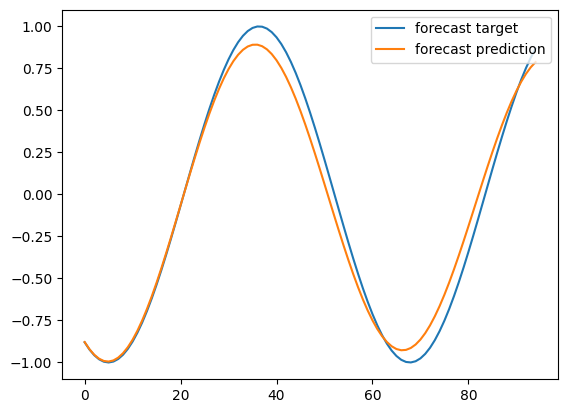

In [67]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()